In [57]:
import pandas 
import matplotlib.pyplot as plt
from numpy import diag, sqrt, exp, linspace
from scipy.optimize import curve_fit
from scipy.stats import linregress
%matplotlib inline

Let's clean up the `assays` DataFrame a bit. I manually removed the '?????' strings and any rows that have the "Well" header from the Gen5. I also removed blank rows. We'll use Pandas to get rid of negative rates while we add in the [substrate concentrations from the experimental procedure](https://github.com/dacarlin/bagel-protocol). I'm also going to use our standard curve to convert the rates into units of M/min. 

In [62]:
df = pandas.read_csv( 'assay_data_cleaned.csv' )
df = df[( df.rate > 0 )]
df.rate = df.rate * 0.0002 * 1000 
df = df.drop( 'assay date', 1 )
smap = dict( zip( 'ABCDEFGH', linspace( 30, 50, 8 )[::-1] ) )
df['temp'] = assays.well.str[0].map( smap )
df.head()

,well,rate,mutant,temp
0,A1,0.000068,WT,50.000000
1,B1,0.000055,WT,47.142857
2,C1,0.000170,WT,44.285714
3,D1,0.011160,WT,41.428571
4,E1,0.031400,WT,38.571429


In [67]:
print df.mutant.unique()
print len( df.mutant.unique() ), 'individual samples'
df.describe()

['WT' 'R76A' 'S16A' 'S400A' 'C167A' 'E53A' 'H178A' 'L171A' 'M323A' 'Q19A'
 'R240A' 'T296A' 'WT1' 'N293C' 'L362M' 'F415N' 'N293Q' 'N220Y' 'W409Y'
 'W399R' 'N220R' 'Y294F' 'N223H' 'Y297F' 'E180K' 'E180L' 'I300N' 'Q316R'
 'K344A' 'W402C' 'M261T' 'N407C' 'E426S' 'V55G' 'W328C' 'N166D' 'H101R'
 'H379T' 'M261D' 'H373R' 'E154D' 'H379R' 'A356A' 'E177A' 'A408A' 'D403A'
 'S334A' 'A195S' 'L174R' 'Y169P' 'W328L' 'Q22S' 'H122N' 'N223G' 'W120A'
 'W34A' 'M323K' 'W407G' 'H122E' 'T178R' 'I247N' 'F75H' 'W328H' 'S19A' '96'
 '97' '98' '100' '101' '104' '106' '114' '116' '117' '119' '121' '122' '38'
 '41' '42' '43' 'I303N' 'Q384R' 'Y295A' 'W407R' 'C167N, W120R' 'I91E'
 'W120F' 'E406D' 'E17S' 'H315N' 'C167Q' 'N220D, N293D' 'W299A' 'Y294A'
 '105' '115' '120' 'E164A' 'N293A' 'Q313R' 'W325L' '124' '126']
104 individual samples


,rate,temp
count,2138.000000,2075.000000
mean,0.008249,39.631670
std,0.019474,6.520561
min,0.000003,30.000000
25%,0.000022,32.857143
50%,0.000126,38.571429
75%,0.003075,44.285714
max,0.114000,50.000000


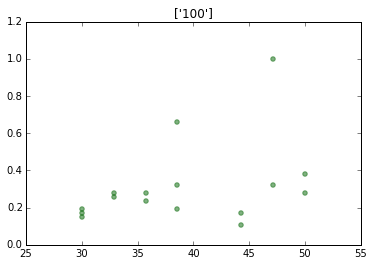

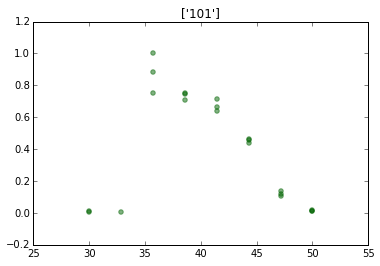

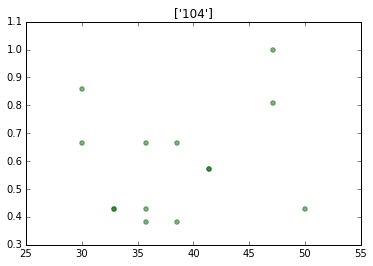

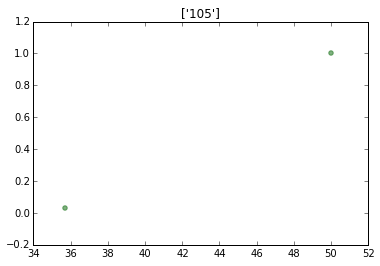

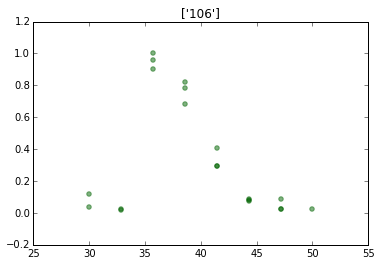

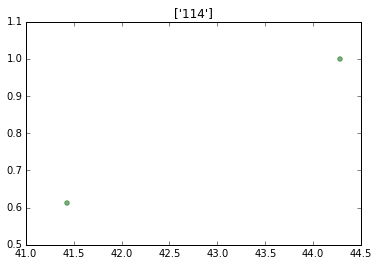

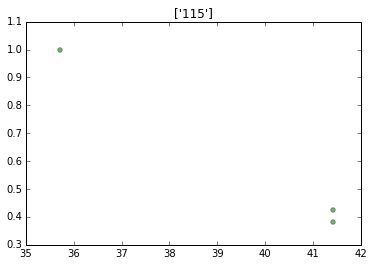

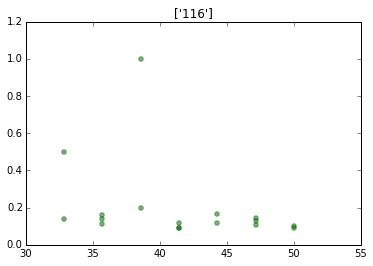

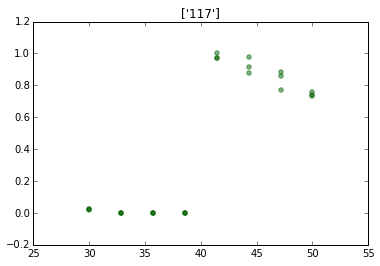

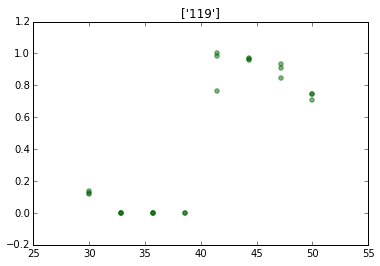

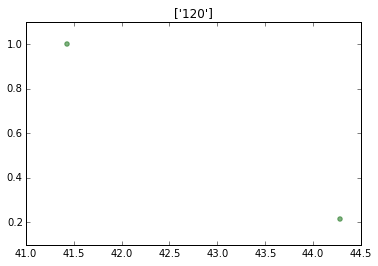

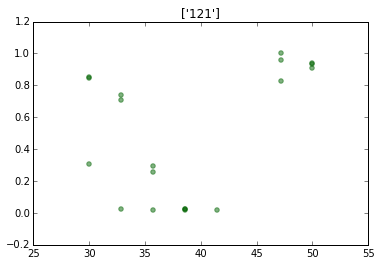

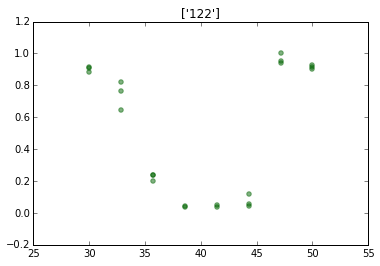

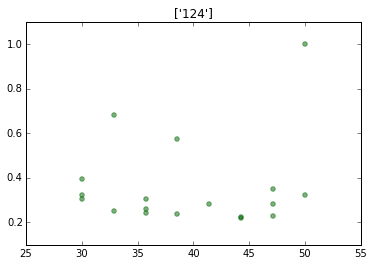

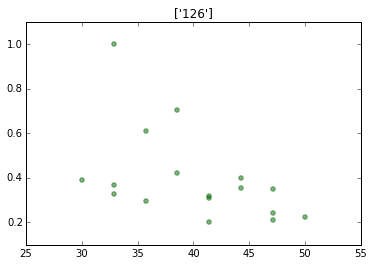

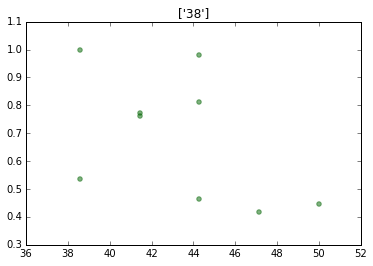

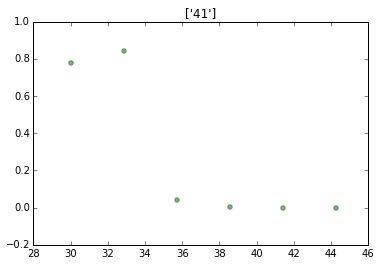

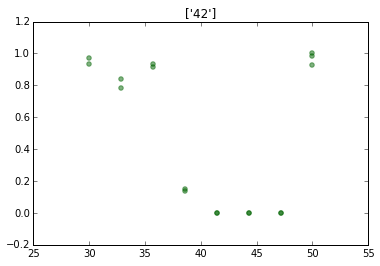

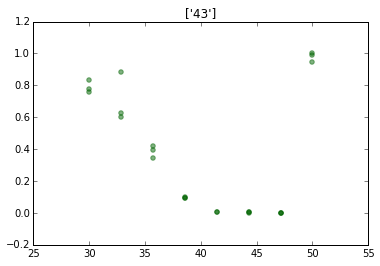

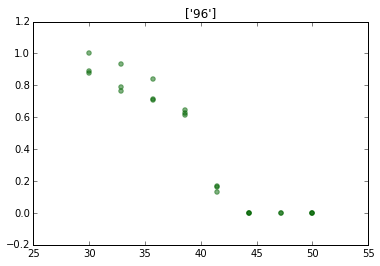

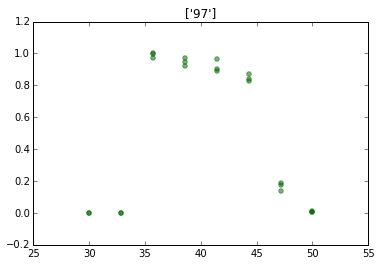

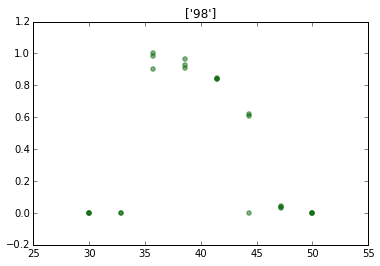

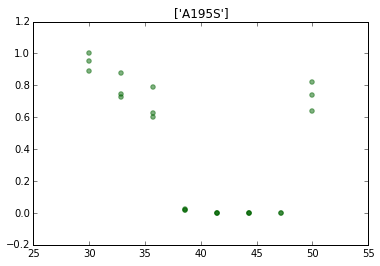

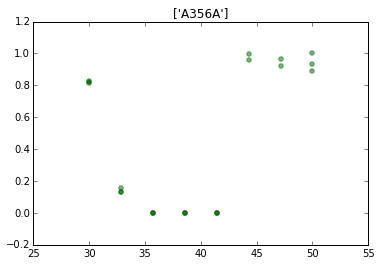

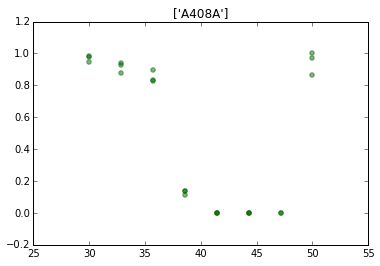

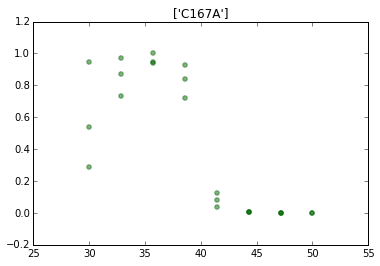

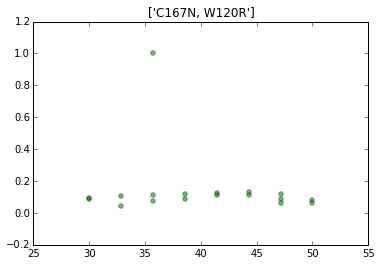

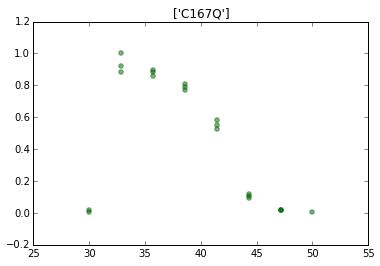

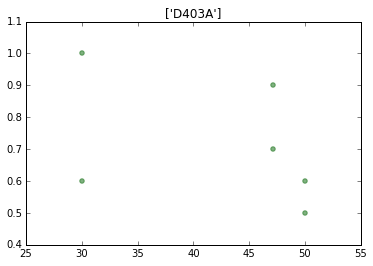

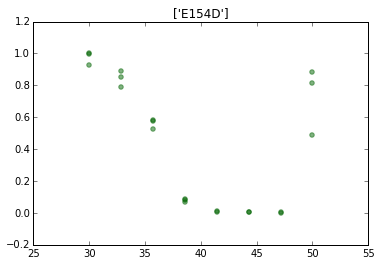

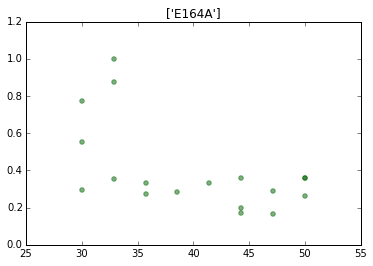

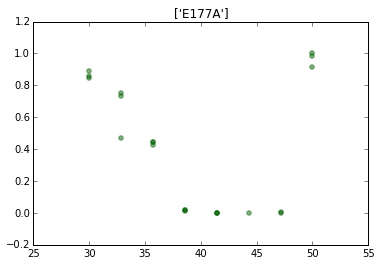

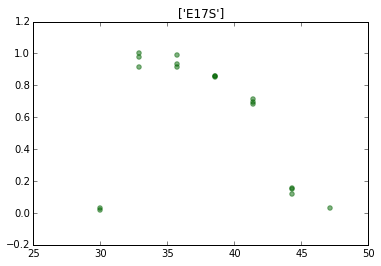

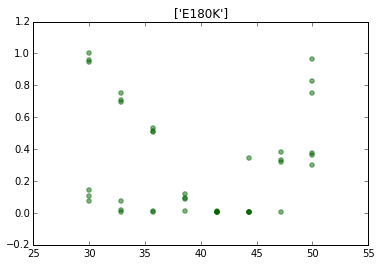

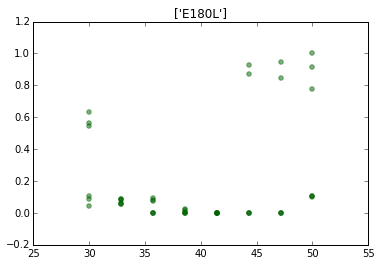

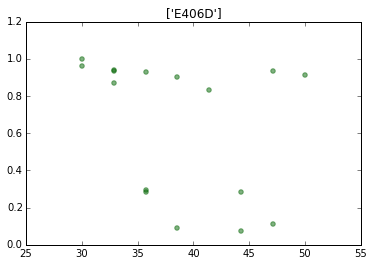

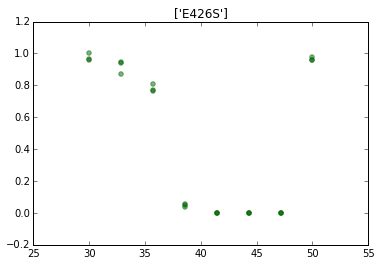

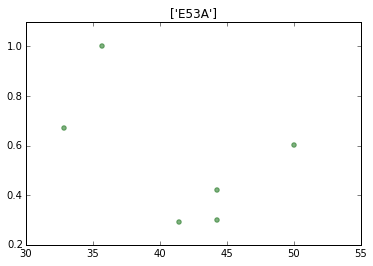

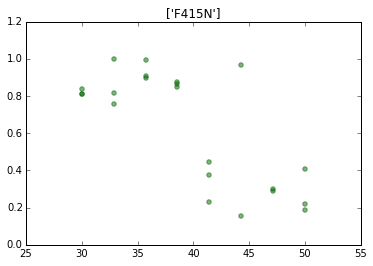

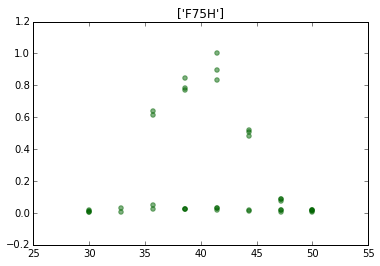

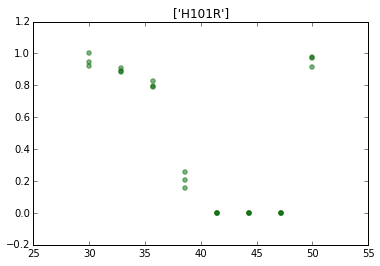

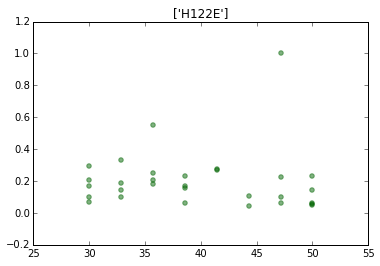

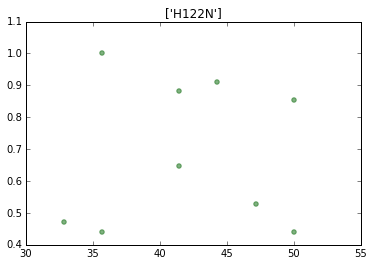

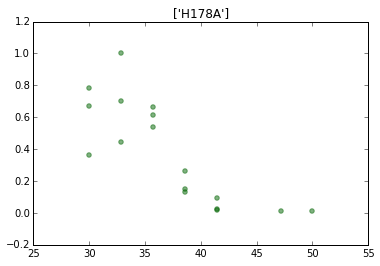

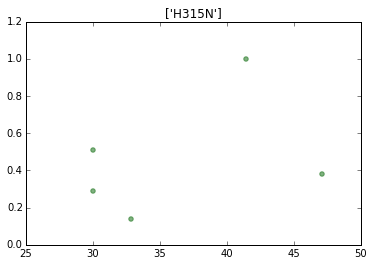

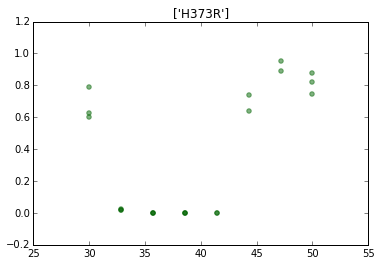

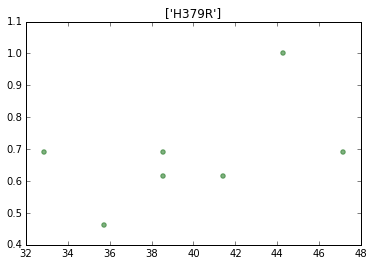

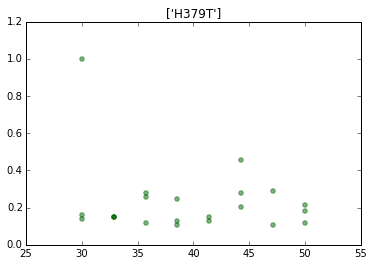

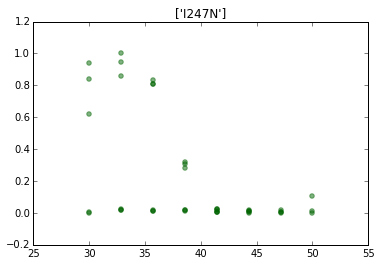

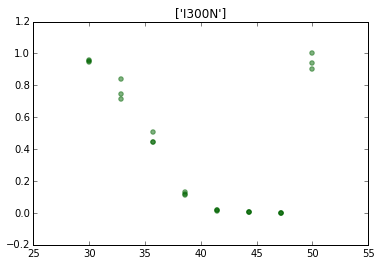

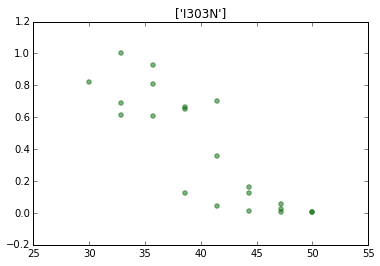

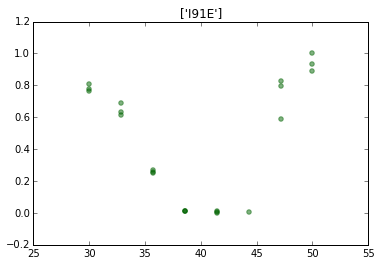

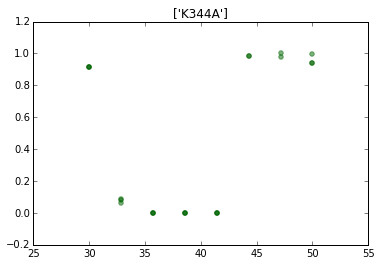

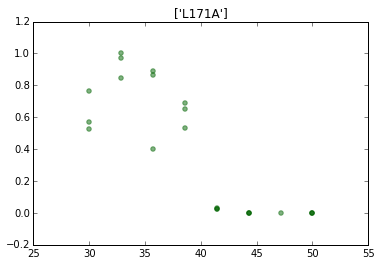

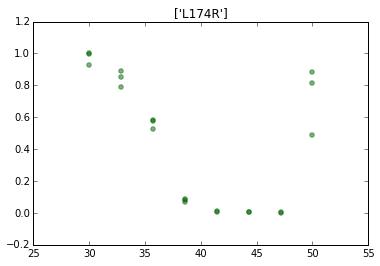

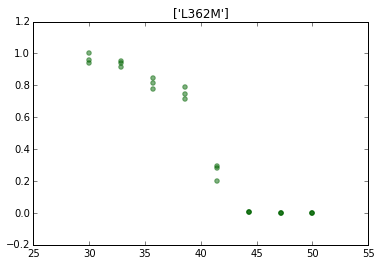

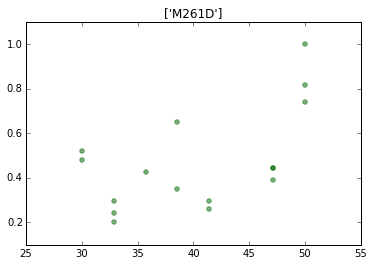

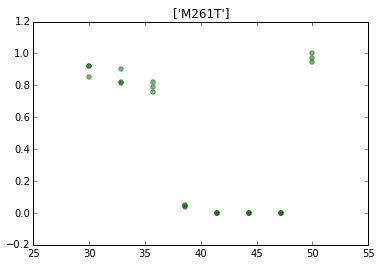

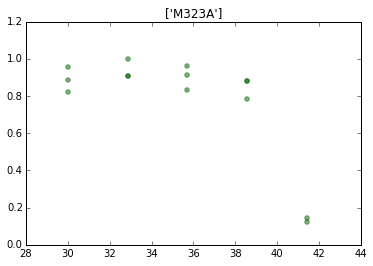

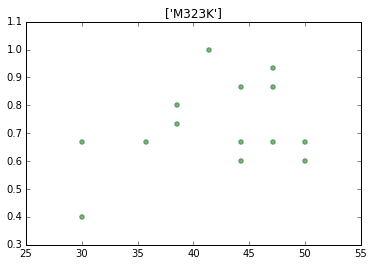

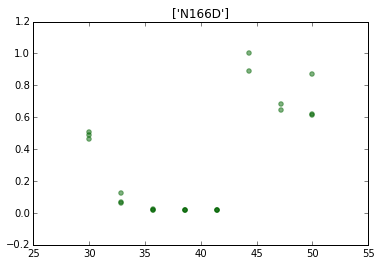

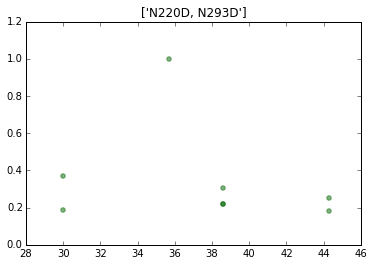

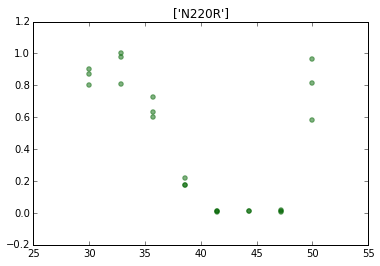

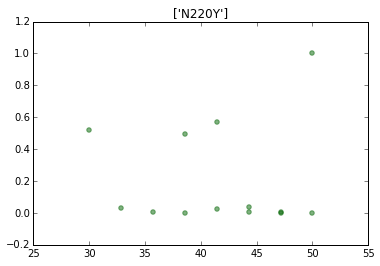

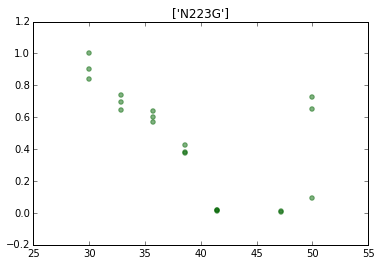

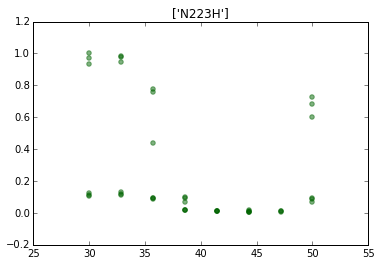

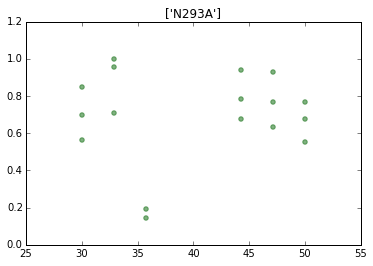

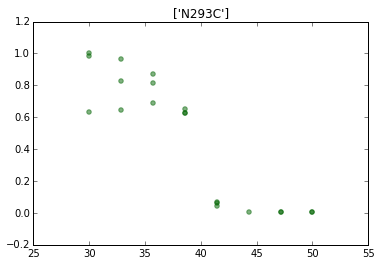

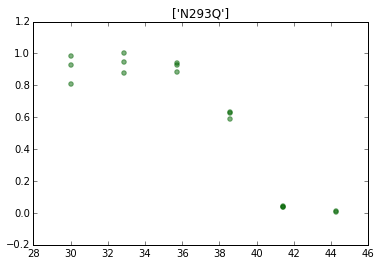

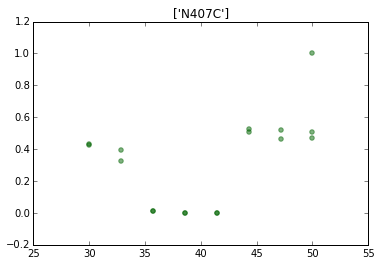

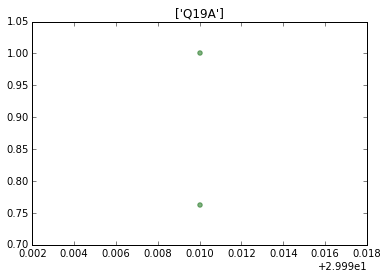

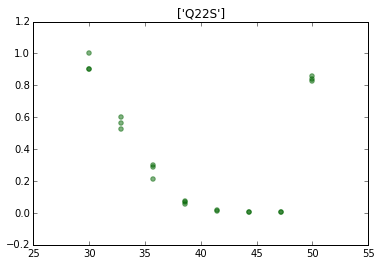

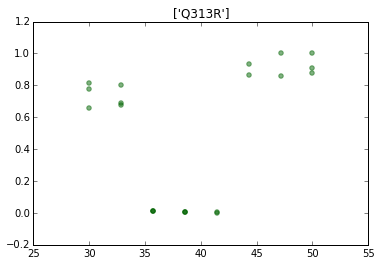

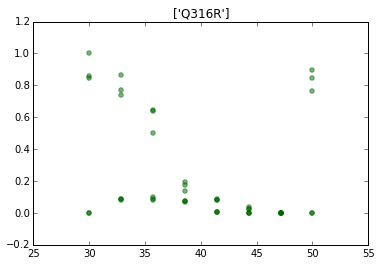

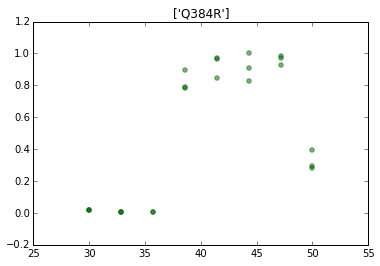

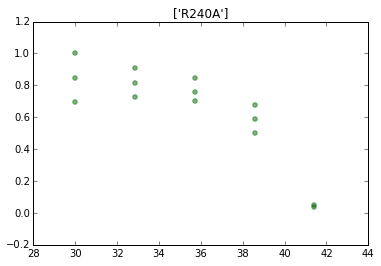

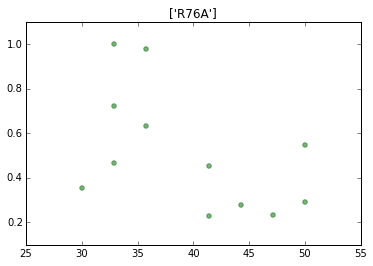

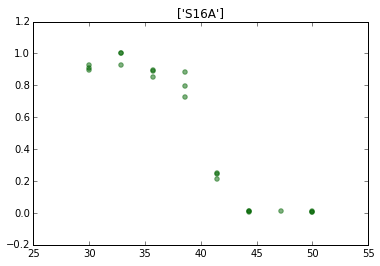

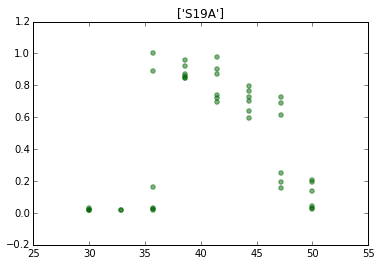

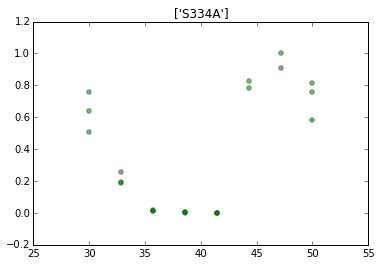

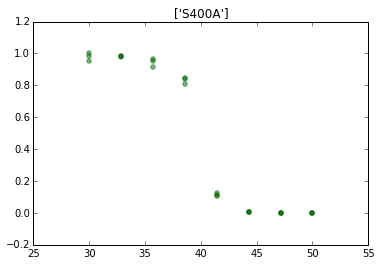

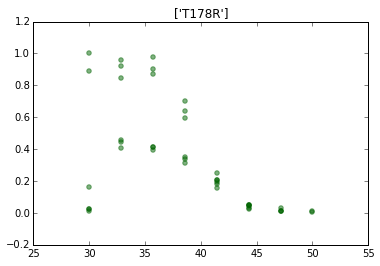

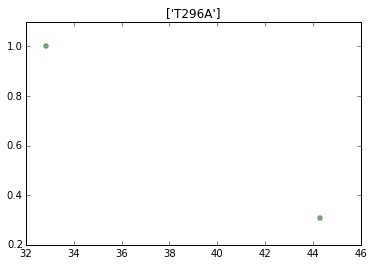

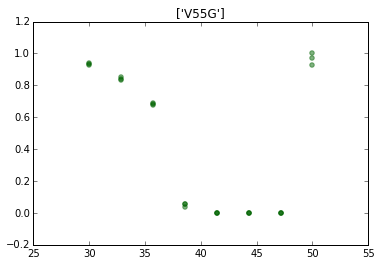

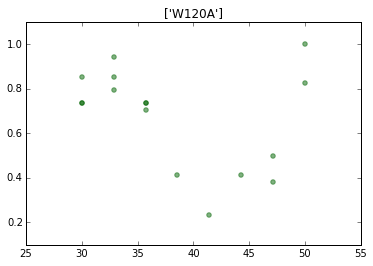

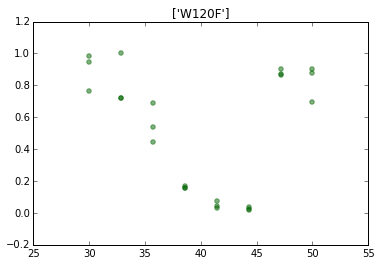

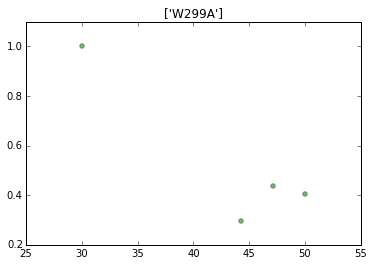

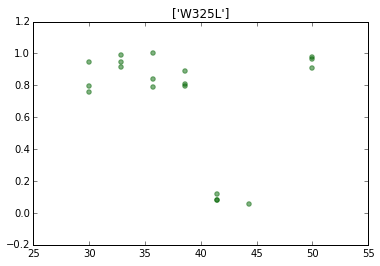

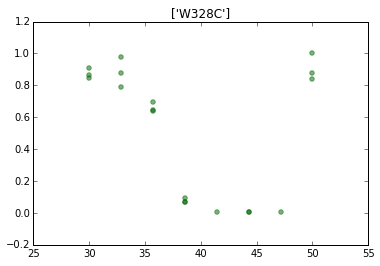

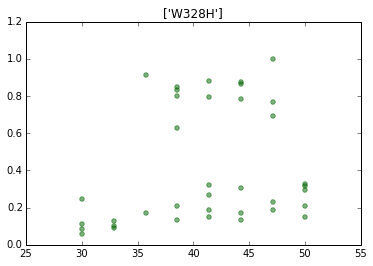

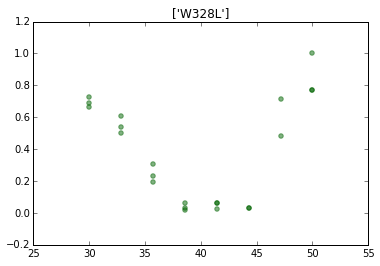

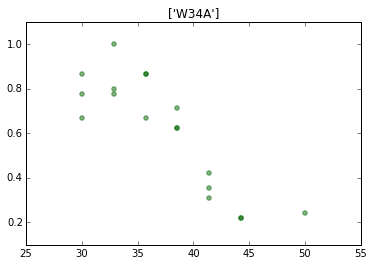

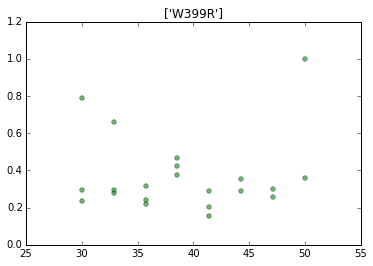

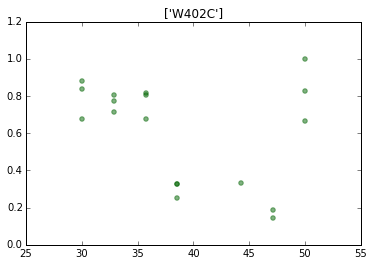

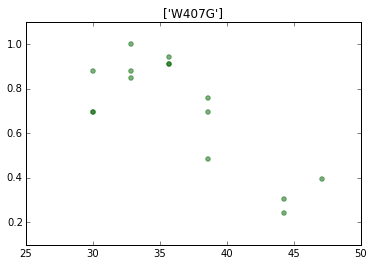

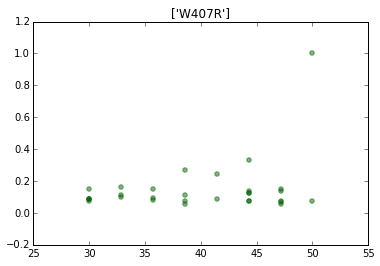

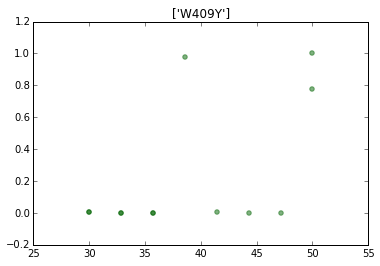

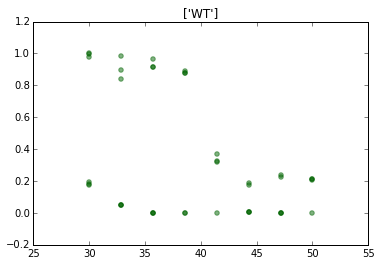

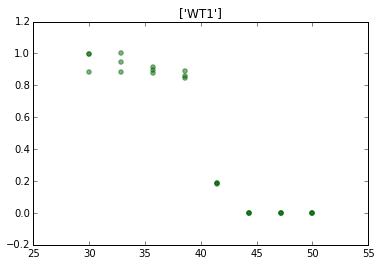

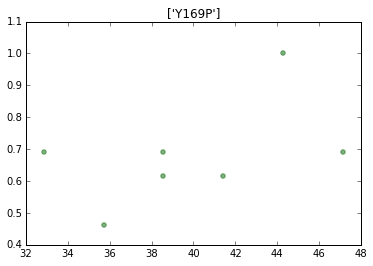

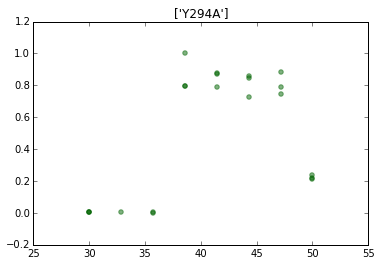

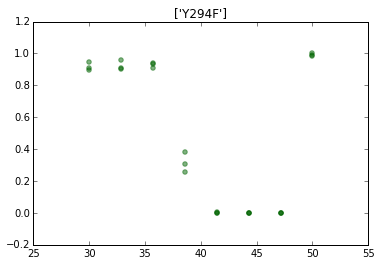

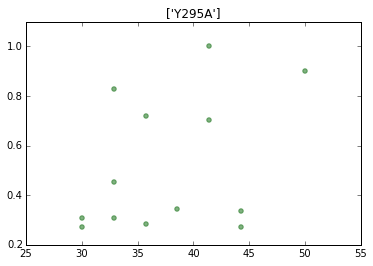

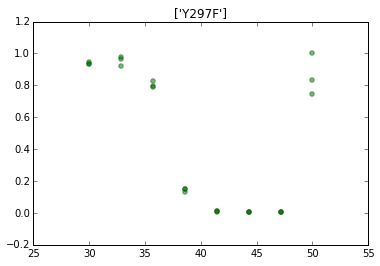

In [61]:
def plot( df ):
    df['per_min'] = df['rate'] / df['rate'].max()
    plt.scatter( df.temp, df.per_min, alpha=0.5, color='darkgreen' )
    plt.title( df.mutant.unique() )
    plt.show()
    
fits = df.groupby( 'mutant' ).apply( plot )